<a href="https://colab.research.google.com/github/AllanHigorLP/Atividade_avaliativa-2.1-RNA/blob/main/Atividade_2_1_RNA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detalhamento da Atividade

In [ ]:
x = 12%4
print(x)

0


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split #to split the dataset for training and testing
from sklearn import metrics
import unicodedata
import io

In [ ]:
!git clone https://github.com/AllanHigorLP/Atividade_avaliativa-2.1-RNA/

fatal: destination path 'Atividade_avaliativa-2.1-RNA' already exists and is not an empty directory.


In [ ]:
df = np.fromfile('/content/Atividade_avaliativa-2.1-RNA/data/dataAll.txt')
print(df)

[-363.7884  244.1423    0.     ... -140.147   734.0983    0.    ]


In [ ]:
df.shape


(3000,)

In [ ]:
df = df.reshape(1000, 3)
print(df)

[[-363.7884  244.1423    0.    ]
 [ 328.7572 -256.7658    1.    ]
 [-164.9827  613.2164    0.    ]
 ...
 [ 872.4311  669.1192    1.    ]
 [ 822.6894 -702.6489    1.    ]
 [-140.147   734.0983    0.    ]]


# Parte I – Resolvendo um Problema Linearmente Separável

In [218]:
# n (taxa de aprendizado)
theta = 0.0
n = 0.1
bias = 1.0
weight_max = 0.5
weight_min = -0.5


In [219]:
weight = np.random.uniform(weight_min, weight_max, size=3)
weight = np.round(weight,4)
print(weight)

[ 0.3801  0.086  -0.3416]


In [216]:
epoca = 0
erros = 1
ajustes_total = 0
ajustes_epoca = 0

def soma_ponderada():
    sum_pond = (weight[0]*(-1*bias)) + (weight[1]*example[0]) + (weight[2]*example[1])
    return sum_pond 

def funcao_ativacao():
    if u >= theta:
        return 1.0
    else:
        return 0.0

def novo_peso(w, fu_ac):
    e = example[2] - fu_ac
    novo_p = w + (n*e*np.array([(-1*bias), example[0], example[1]]))
    novo_p = np.round(novo_p,4)
    return novo_p
    
while (erros != 0):
    epoca = epoca + 1
    ajustes_epoca = 0
    erros = 0
    
    for example in df:
        funct_act = 0.0
        u = 0.0
        u = soma_ponderada()
        funct_act = funcao_ativacao()
        
        if funct_act != example[2]:
            ajustes_epoca = ajustes_epoca + 1
            ajustes_total = ajustes_total + 1
            erros = 1
            weight = novo_peso(weight, funct_act)
            print("Novo vetor de pesos ajustado", weight, "\n")
            
    print("Qtd de ajustes do vetor de pesos na época", epoca, ":", ajustes_epoca, "\n")
    
print("\nVetor de pesos final (ajustado): ", weight)
print("Número total de ajustes do vetor de pesos:", ajustes_total)
print("Número total de epocas:", epoca)

Novo vetor de pesos ajustado [ -0.1857  35.9854 -24.1596] 

Novo vetor de pesos ajustado [  -0.0857  -17.6737 -100.6554] 

Novo vetor de pesos ajustado [ -0.1857  55.1223 -64.8258] 

Novo vetor de pesos ajustado [ -0.2857 137.721   15.03  ] 

Novo vetor de pesos ajustado [ -0.1857 143.5668 -63.2646] 

Novo vetor de pesos ajustado [  -0.0857  103.5579 -141.1573] 

Novo vetor de pesos ajustado [  0.0143 157.2277 -92.065 ] 

Novo vetor de pesos ajustado [  -0.0857  104.2676 -148.9345] 

Novo vetor de pesos ajustado [  0.0143 163.8271 -98.8122] 

Novo vetor de pesos ajustado [  -0.0857  118.3025 -164.4481] 

Novo vetor de pesos ajustado [  0.0143 209.0184 -89.7348] 

Novo vetor de pesos ajustado [  -0.0857  151.2374 -150.043 ] 

Novo vetor de pesos ajustado [  -0.1857  102.9708 -198.5127] 

Novo vetor de pesos ajustado [  -0.2857  173.4182 -156.3964] 

Novo vetor de pesos ajustado [  -0.3857  126.5762 -207.8063] 

Novo vetor de pesos ajustado [  -0.4857  196.4398 -143.5874] 

Novo vetor de

AttributeError: ignored

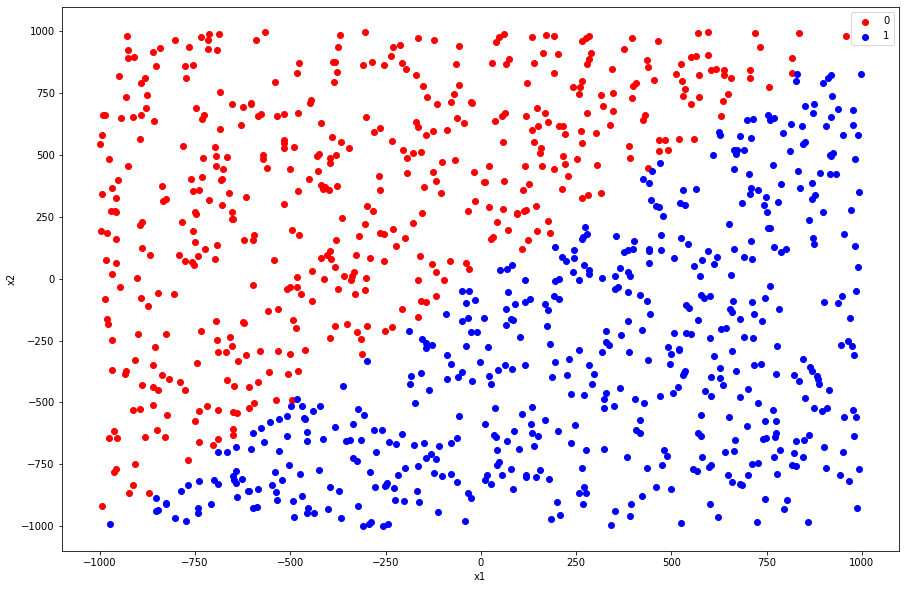

In [280]:
plt.figure(figsize=(15,10))

x_classe0 = []
y_classe0 = []
x_classe1 = []
y_classe1 = []

classe0 = []

for example in df:
    if example[2] == 0.0:
        x_classe0.append(example[0])
        y_classe0.append(example[1])
    if example[2] == 1.0:
        x_classe1.append(example[0])
        y_classe1.append(example[1])
        
plt.scatter(x_classe0, y_classe0, color='r', label='0')
plt.scatter(x_classe1, y_classe1, color='b', label='1')

plt.legend()
plt.xlabel("x1")
plt.ylabel("x2")

slp = -(weight[0]/weight[2]) / (weight[0]/weight[1])
end = (weight[0]/weight[2])
plt.axline((0, end), slope=slp, color="black")

plt.show()